# Chapter 9. Unsupervised Learning Techniques

In Chapter 8 we looked at the most common unsupervised learning task: dimensionality reduction. In this chapter we will look at a few more unsupervised learning tasks and algorithms:

**Clustering**
    
    The goal is to group similar instances together into clusters. Clustering is a great tool for data analysis, customer segmentation, recommender systems, search engines, image segmentation, semi-supervised learning, dimensionality reduction, and more.

**Anomaly detection**
    
    The objective is to learn what “normal” data looks like, and then use that to detect abnormal instances, such as defective items on a production line or a new trend in a time series.

**Density estimation**

    This is the task of estimating the probability density function (PDF) of the random process that generated the dataset. Density estimation is commonly used for anomaly detection: instances located in very low-density regions are likely to be anomalies. It is also useful for data analysis and visualization.

## Clustering

#### Clustering is used in a wide variety of applications, including these:

**For customer segmentation**

    You can cluster your customers based on their activity on your website. This is useful to understand who your customers are and what they need, so you can adapt your products and marketing campaigns to each segment.

**For data analysis**

    When you analyze a new dataset, it can be helpful to run a clustering algorithm, and then analyze each cluster separately.

**As a dimensionality reduction technique**

    Confused section ./ 
  I will take a look later.

**For anomaly detection (also called outlier detection)**

    Any instance that has a low affinity to all the clusters is likely to be an anomaly. For example, if you have clustered the users of your website based on their behavior, you can detect users with unusual behavior, such as an unusual number of requests per second. Anomaly detection is particularly useful in detecting defects in manufacturing, or for fraud detection.

**For semi-supervised learning**

    If you only have a few labels, you could perform clustering and propagate the labels to all the instances in the same cluster. This technique can greatly increase the number of labels available for a subsequent supervised learning algorithm, and thus improve its performance.

**For search engines**

    Some search engines let you search for images that are similar to a reference image. To build such a system, you would first apply a clustering algorithm to all the images in your database; similar images would end up in the same cluster. 

**To segment an image**

    By clustering pixels according to their color, then replacing each pixel’s color with the mean color of its cluster, it is possible to considerably reduce the number of different colors in the image. Image segmentation is used in many object detection and tracking systems, as it makes it easier to detect the contour of each object.

In this section, we will look at two popular clustering algorithms,0 **K-Means** and **DBSCAN**, and explore some of their applications, such as nonlinear dimensionality reduction, semi-supervised learning, and anomaly detection.

In this example, the first instance in X_new is located at a distance of 2.81 from the first centroid, 0.33 from the second centroid, 2.90 from the third centroid, 1.49 from the fourth centroid, and 2.89 from the fifth centroid. If you have a high-dimensional dataset and you transform it this way, you end up with a k-dimensional dataset: this transformation can be a very efficient nonlinear dimensionality reduction technique. | **Actually i didnt totally understand this section. I mean, dimensionality redction technique.**

---
### THE K-MEANS ALGORITHM

How its work? Here is useful content: https://www.youtube.com/watch?v=4b5d3muPQmA&ab_channel=StatQuestwithJoshStarmer

And this's what am ı got it: Just begins with randomly selected points in data, and labeled nearest instances, update, labeled.. update... 

Usally it will take relatively short time but some complex situation, it may increases exponentially.

But usally its one of the fastest clustering algorithms. 

Here's the example of k means. As you can see, in just three iterations, the algorithm has reached a clustering that seems close to optimal.
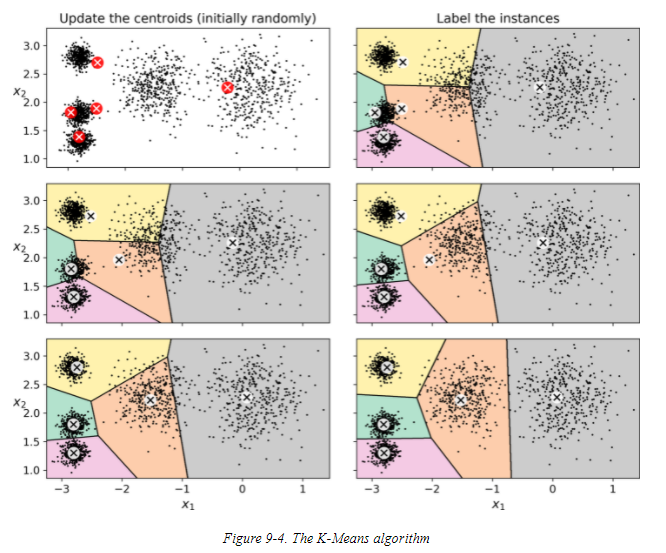

And sometimes just because be unlucky, it may end up bad clustered like that: 
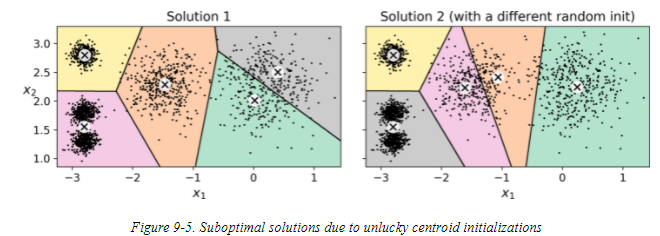
But ofcurse there is ways that could increase this risk. 

### CENTROID INITIALIZATION METHODS

If you happen to know approximately where the centroids should be (e.g., if you ran another clustering algorithm earlier), then you can set the init hyperparameter to a NumPy array containing the list of centroids, and set n_init to 1:

Like That: 

Another solution is run algorith multiple times with n_ init hyperparameter when its fitting. Ands Scikit-Learn keeps best solution. 

Bast solution is measured with **inerita**, which is mean squared distance between each instance and its closest centroid.

it could access with kmeansmodel.inhrita_

or .score() a negative inherita.

And another solution, | **Default of kmeans**

An important improvement to the K-Means algorithm, K-Means++, was proposed in a 2006 paper by David Arthur and Sergei Vassilvitskii.3 They introduced a smarter initialization step that tends to select centroids that are distant from one another, and this improvement makes the K-Means algorithm much less likely to converge to a suboptimal solution. They showed that the additional computation required for the smarter initialization step is well worth it because it makes it possible to drastically reduce the number of times the algorithm needs to be run to find the optimal solution. **How its works, example of that is in the book** 

**The KMeans class uses this initialization method by default**. If you want to force it to use the original method (i.e., picking k instances randomly to define the initial centroids), then you can set the init hyperparameter to "random". You will rarely need to do this.

### ACCELERATED K-MEANS AND MINI-BATCH K-MEANS

Another important improvement to the K-Means algorithm was proposed in a 2003 paper by Charles Elkan.4 It considerably accelerates the algorithm by avoiding many unnecessary distance calculations. || **Thats default algorithm and probably will never change.**

Yet another important variant of the K-Means algorithm was proposed in a 2010 paper by David Sculley.6 Instead of using the full dataset at each iteration, the algorithm is capable of using mini-batches, moving the centroids just slightly at each iteration. This speeds up the algorithm typically by a factor of three or four and makes it possible to cluster huge datasets that do not fit in memory. Scikit-Learn implements this algorithm in the MiniBatchKMeans class. You can just use this class like the KMeans class:

Although the Mini-batch K-Means algorithm is much faster than the regular K-Means algorithm, its inertia is generally slightly worse, especially as the number of clusters increases. 
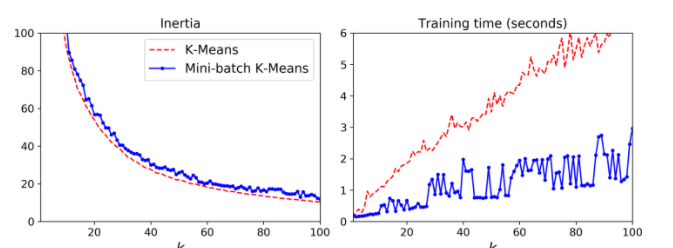

## FINDING THE OPTIMAL NUMBER OF CLUSTERS

The first thing that comes to your mind will be inerita. But inerita is just good at the same k values. For example, a good clustred data with k=3 inherita, may be bigger than bad clustred data with k=8.   

So what we use while measure k-means performance?:
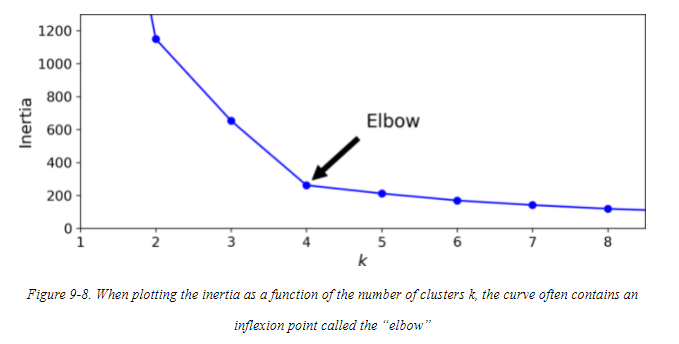

As you can see, the inertia drops very quickly as we increase k up to 4, but then it decreases much more slowly as we keep increasing k. This curve has roughly the shape of an arm, and there is an “elbow” at k = 4. So, if we did not know better, 4 would be a good choice:

---

A more precise approach (but also more computationally expensive) is to use the **silhouette score**, which is the mean silhouette coefficient over all the instances. An instance’s silhouette coefficient is equal to (b – a) / max(a, b), where a is the mean distance to the other instances in the same cluster (i.e., the mean intra-cluster distance) and b is the mean nearest-cluster distance (i.e., the mean distance to the instances of the next closest cluster, defined as the one that minimizes b, excluding the instance’s own cluster). The silhouette coefficient can vary between –1 and +1. A coefficient close to +1 means that the instance is well inside its own cluster and far from other clusters, while a coefficient close to 0 means that it is close to a cluster boundary, and finally a coefficient close to –1 means that the instance may have been assigned to the wrong cluster.

To compute the silhouette score, you can use Scikit-Learn’s **silhouette_score()** function, giving it all the instances in the dataset and the labels they were assigned:

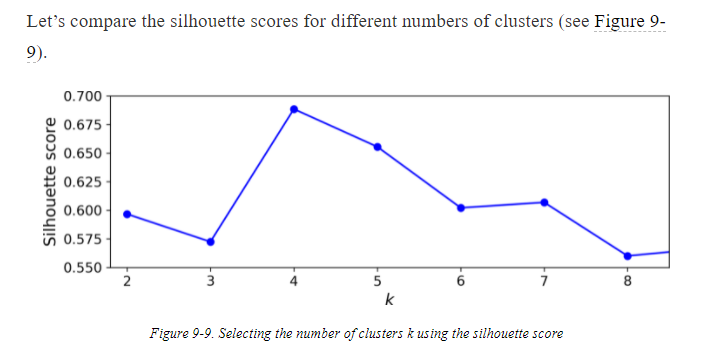

An even more informative visualization is obtained when you plot every instance’s silhouette coefficient, sorted by the cluster they are assigned to and by the value of the coefficient. This is called a silhouette diagram (see Figure 9-10). Each diagram contains one knife shape per cluster

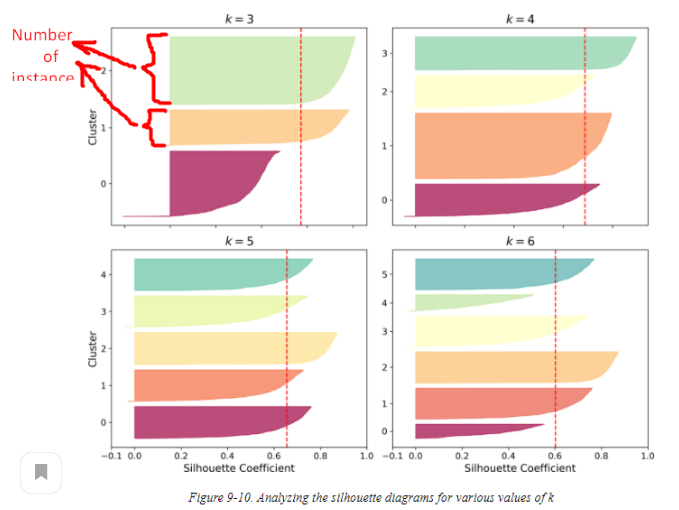

The vertical dashed lines represent the silhouette score for each number of clusters. When most of the instances in a cluster have a lower coefficient than this score (i.e., if many of the instances stop short of the dashed line, ending to the left of it), then the cluster is rather bad since this means its instances are much too close to other clusters. We can see that when k = 3 and when k = 6, we get bad clusters. But when k = 4 or k = 5, the clusters look pretty good: most instances extend beyond the dashed line, to the right and closer to 1.0. When k = 4, the cluster at index 1 (the third from the top) is rather big. When k = 5, all clusters have similar sizes. So, even though the overall silhouette score from k = 4 is slightly greater than for k = 5, it seems like a good idea to use k = 5 to get clusters of similar sizes.

---

### Limits of K-Means

sometimes kmeasns cannot give you a good job. For example:
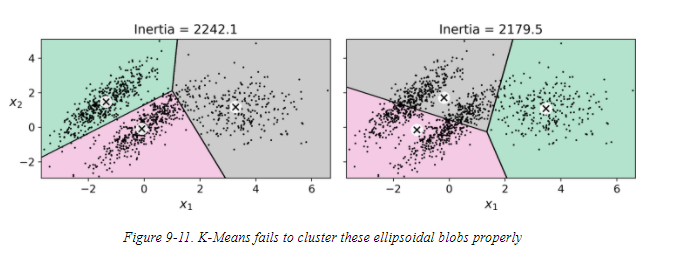

As you can see, neither of these solutions is any good. The solution on the left is better, but it still chops off 25% of the middle cluster and assigns it to the cluster on the right. The solution on the right is just terrible, even though its inertia is lower. So, depending on the data, different clustering algorithms may perform better. On these types of elliptical clusters, Gaussian mixture models work great.

---

**TIP**

It is important to **SCALE** the input features before you run K-Means, or the clusters may be very stretched and K-Means will perform poorly. Scaling the features does not guarantee that all the clusters will be nice and spherical, but it generally improves things.

Now let’s look at a few ways we can benefit from clustering. We will use K-Means, but feel free to experiment with other clustering algorithms

### Using Clustering for Image Segmentation

The state of the art in semantic or instance segmentation today is achieved using complex architectures based on convolutional neural networks (see Chapter 14). Here, we are going to do something much simpler: color segmentation. We will simply assign pixels to the same segment if they have a similar color. In some applications, this may be sufficient. For example, if you want to analyze satellite images to measure how much total forest area there is in a region, color segmentation may be just fine.

First, use Matplotlib’s imread() function to load the image (see the upper-left image in Figure 9-12):

(192, 263, 3)


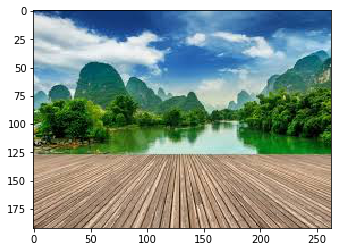

In [38]:
import os
from sklearn.cluster import KMeans 
from matplotlib import pyplot as plt 
from matplotlib.image import imread
pic = plt.imread('image_for_clustering.jpeg')/255  # dividing by 255 to bring the pixel values between 0 and 1
print(pic.shape)
plt.imshow(pic)

In [39]:
pic[:2]

array([[[0.10588235, 0.25098039, 0.45490196],
        [0.21568627, 0.36078431, 0.56470588],
        [0.25098039, 0.39607843, 0.6       ],
        ...,
        [0.16470588, 0.36078431, 0.59215686],
        [0.16470588, 0.36078431, 0.59215686],
        [0.16470588, 0.36078431, 0.59215686]],

       [[0.15686275, 0.29019608, 0.47058824],
        [0.1254902 , 0.27058824, 0.44705882],
        [0.15686275, 0.29803922, 0.48627451],
        ...,
        [0.15294118, 0.34901961, 0.58039216],
        [0.15294118, 0.34901961, 0.58039216],
        [0.14901961, 0.34509804, 0.57647059]]])

for clustering the image we have to convert to 2 dimentional array. 

In [40]:
#bu reshape islemini neden yaptığımı anlamadım. inanılmaz uykum var, 
#ingilizce bile yazamıyorum. Tekrar edersen buraya bir daha bah 
pic_n = pic.reshape(-1, 3)
pic_n.shape
pic_n[:5]

array([[0.10588235, 0.25098039, 0.45490196],
       [0.21568627, 0.36078431, 0.56470588],
       [0.25098039, 0.39607843, 0.6       ],
       [0.15294118, 0.29803922, 0.50196078],
       [0.07058824, 0.21568627, 0.42352941]])

In [45]:
def cluster_image(k):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(pic_n)
    pic2show = kmeans.cluster_centers_[kmeans.labels_]
    cluster_pic = pic2show.reshape(pic.shape[0], pic.shape[1], pic.shape[2]) #bunu neden yaptıgimi tam olarak anlamadım inanılmaz uykum var, tekrar bakında bunun uzerine gidecegim. 
    plt.imshow(cluster_pic)

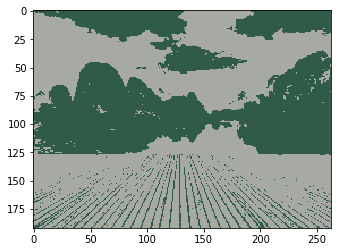

In [42]:
cluster_image(2)

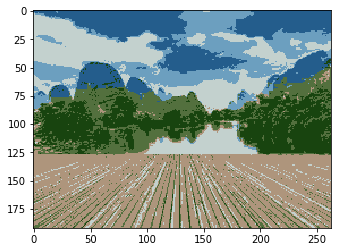

In [43]:
cluster_image(6)

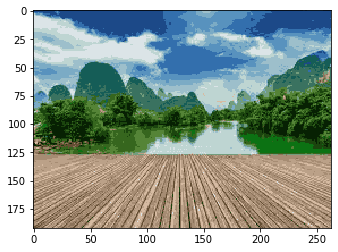

In [44]:
cluster_image(20)

## Using Clustering for Preprocessing

Clustering can be an efficient preprocessing step before a supervised learning algorithm. As an example of using clustering for preprocessing, let’s tackle the digits dataset, which is a simple MNIST-like dataset containing 1,797 grayscale 8 × 8 images representing the digits 0 to 9. First, load the dataset:

In [2]:
from sklearn.datasets import load_digits
X_digits, y_digits = load_digits(return_X_y=True)

In [5]:
X_digits[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

How its looking thats numbers:

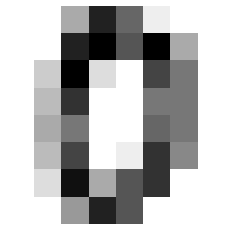

In [14]:
import matplotlib as mpl
import matplotlib.pyplot as plt
some_digit = X_digits[0]
some_digit_image = some_digit.reshape(8,8)

plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show()

In [29]:
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits)
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg.score(X_test, y_test)

0.9622222222222222

As you can see, we end up 0.96 accuracy. So lets apply clustering with pipeline and see whats going on

In [106]:
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
pipe_line= Pipeline([
    ("kmeans", KMeans(n_clusters=50,random_state=40)),
    (("log_reg"), LogisticRegression()),
])
pipe_line.fit(X_train,y_train);

In [107]:
pipe_line.score(X_test, y_test)

0.9733333333333334

As you can see, thats may be better -it could be worse too-.

If you want to a better understanding, check out the code below.

In [179]:
kmeans=KMeans(n_clusters=50,random_state=40)
y_pred=kmeans.fit_predict(X_train)
list_=[]
for i, value in zip(range(len(y_pred)), y_pred): 
    if(value==6):
        list_.append(i)
y_pred[[list_]]

array([6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6])

In [180]:
y_train[[list_]]

array([1, 8, 1, 8, 8, 8, 8, 9, 1, 8, 1, 8, 8, 8, 1, 8, 8, 8, 8, 1, 1])

### Using Clustering for Semi-Supervised Learning

Another use case for clustering is in semi-supervised learning, **when we have plenty of unlabeled instances and very few labeled instances**

 Let’s train a Logistic Regression model on a sample of 50 labeled instances from the digits dataset:

In [529]:
from sklearn.datasets import load_digits
X_digits, y_digits = load_digits(return_X_y=True)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits)

> **With normal labeled data:**

In [530]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg.score(X_test, y_test)

0.9733333333333334

> **With 50 labeled data:** 

In [531]:
n_labeled = 50
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])
log_reg.score(X_test, y_test)


0.8355555555555556

In [532]:
X_train[:n_labeled].shape

(50, 64)

score with trained 50 labeled features is 0.8.

Than lets try with clusted train set with k=50;

> **With 50 labeled data with semisupervised:**

In [533]:
import numpy as np
k = 50
kmeans = KMeans(n_clusters=k)
X_digits_dist = kmeans.fit_transform(X_train)  #measures the distance from each instance to every centroid:
representative_digit_idx = np.argmin(X_digits_dist, axis=0)#min value for each column
X_representative_digits = X_train[representative_digit_idx]#take 

In [534]:
y_representative_digits=y_train[representative_digit_idx]

In [535]:
log_reg = LogisticRegression()
log_reg.fit(X_representative_digits, y_representative_digits)
log_reg.score(X_test, y_test)

0.9333333333333333

    We jumped from 78% accuracy to 0.9

Since it is often costly and painful to label instances, especially when it has to be done manually by experts, it is a good idea to label representative instances rather than just random instances.

In [536]:
y_train_propagated = np.empty(len(X_train), dtype=np.int32)
for i in range(k):
    y_train_propagated[kmeans.labels_==i] = y_representative_digits[i]

In [537]:
y_train_propagated.shape

(1347,)

In [538]:
y_representative_digits

array([1, 9, 6, 0, 3, 7, 5, 1, 1, 4, 2, 4, 5, 8, 5, 7, 1, 3, 2, 8, 2, 6,
       2, 0, 5, 4, 8, 7, 7, 4, 9, 3, 4, 7, 7, 1, 9, 3, 2, 8, 9, 0, 6, 1,
       9, 6, 5, 5, 2, 9])

In [539]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train_propagated)
log_reg.score(X_test, y_test)

0.9377777777777778

its better but it could be worse. The important is, thats generally will be useful.

We got a reasonable accuracy boost, but nothing absolutely astounding. The problem is that we propagated each representative instance’s label to all the instances in the same cluster, including the instances located close to the cluster boundaries, which are more likely to be mislabeled. Let’s see what happens if we only propagate the labels to the 20% of the instances that are closest to the centroids:

In [651]:
percentile_closest = 20

X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]
k=50
kmeans = KMeans(n_clusters=k)
X_digits_dist = kmeans.fit_transform(X_train)  #measures the distance from each instance to every centroid:
for i in range(k):
    in_cluster = (kmeans.labels_ == i)
    cluster_dist = X_cluster_dist[in_cluster]
    cutoff_distance = np.percentile(cluster_dist, percentile_closest)
    above_cutoff = (X_cluster_dist > cutoff_distance)
    X_cluster_dist[in_cluster & above_cutoff] = -1

partially_propagated = (X_cluster_dist != -1)
X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]

In [652]:
log_reg = LogisticRegression()
log_reg.fit(X_train_partially_propagated, y_train_partially_propagated)
log_reg.score(X_test, y_test)

0.9266666666666666

Now we have 0.92 accuracy, thats lower than before but generally it will be better. For see how its flexible that change when we play k and perventile values. 

In [654]:
#that is, measure of differences between actual y value and filled y value
#according to clusters. you can change that with play percentile_closest value
np.mean(y_train_partially_propagated == y_train[partially_propagated])  

0.9548611111111112

In [648]:
array=(y_train_partially_propagated == y_train[partially_propagated])

In [615]:
arr=(array==True)
sum(arr)

50

array(False)

### Active learning: 

This section is in the book

---
# DBSCAN

Another popular clustering algorithm that illustrates a very different approach based on local density estimation. This approach allows the algorithm to identify clusters of arbitrary shapes.

It's in the book. 

---

## Other Clustering Algorithms

#### Agglomerative clustering

This approach scales very well to large numbers of instances or clusters. It can capture clusters of various shapes, it produces a flexible and informative cluster tree instead of forcing you to choose a particular cluster scale, and it can be used with any pairwise distance. It can scale nicely to large numbers of instances if you provide a connectivity matrix, which is a sparse m × m matrix that indicates which pairs of instances are neighbors (e.g., returned by sklearn.neighbors.kneighbors_graph()). Without a connectivity matrix, the algorithm does not scale well to large datasets.

#### BIRCH
The BIRCH (Balanced Iterative Reducing and Clustering using Hierarchies) algorithm was designed specifically for very large datasets, and it can be faster than batch K-Means, with similar results, as long as the number of features is not too large (<20). 

#### Mean-Shift
This algorithm starts by placing a circle centered on each instance; then for each circle it computes the mean of all the instances located within it, and it shifts the circle so that it is centered on the mean. Unfortunately, its computational complexity is O(m2), so it is not suited for large datasets.

#### Affinity propagation
This algorithm uses a voting system, where instances vote for similar instances to be their representatives, and once the algorithm converges, each representative and its voters form a cluster. Affinity propagation can detect any number of clusters of different sizes. Unfortunately, this algorithm has a computational complexity of O(m2), so it too is not suited for large datasets.

#### Spectral clustering
Spectral clustering can capture complex cluster structures, and it can also be used to cut graphs (e.g., to identify clusters of friends on a social network). It does not scale well to large numbers of instances, and it does not behave well when the clusters have very different sizes.

Now let’s dive into **Gaussian mixture** models, which can be used for density estimation, clustering, and anomaly detection.

## Gaussian Mixtures

### Theory

How its works? 

 - Technique details too complex, look at the book. 
 
Useful content: https://www.youtube.com/watch?v=q71Niz856KE&ab_channel=LuisSerrano
 
Useful content: https://www.geeksforgeeks.org/gaussian-mixture-model/
 
How measure is destiny mountain hight:

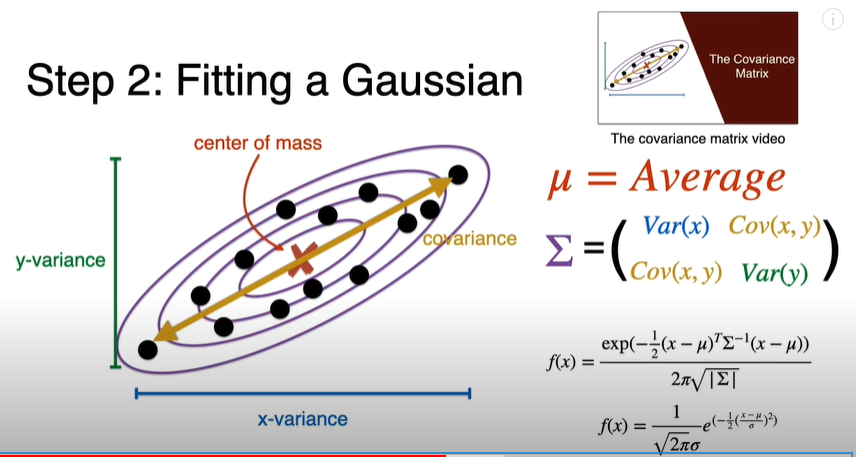

**How its working?**

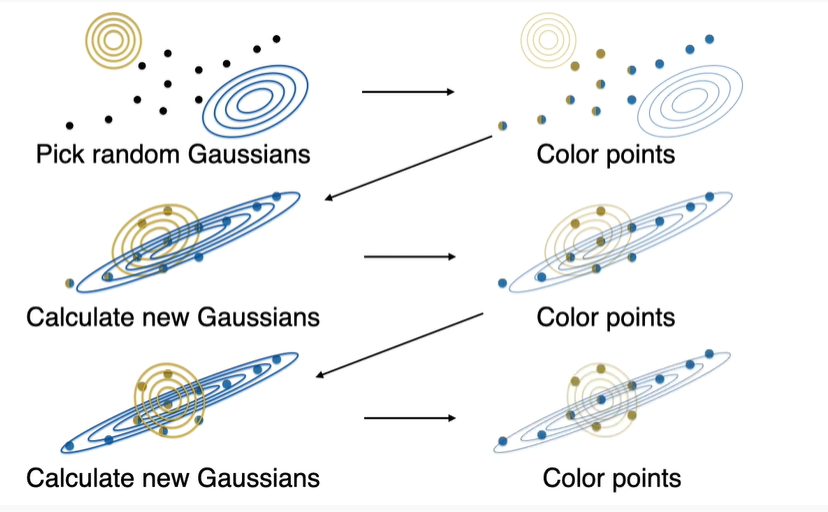


---

A Gaussian mixture model (GMM) is a probabilistic model that assumes that the instances were generated from a mixture of several Gaussian distributions whose parameters are unknown.

Sometimes each cluster can have a different ellipsoidal shape, size, density, and orientation, just like this:




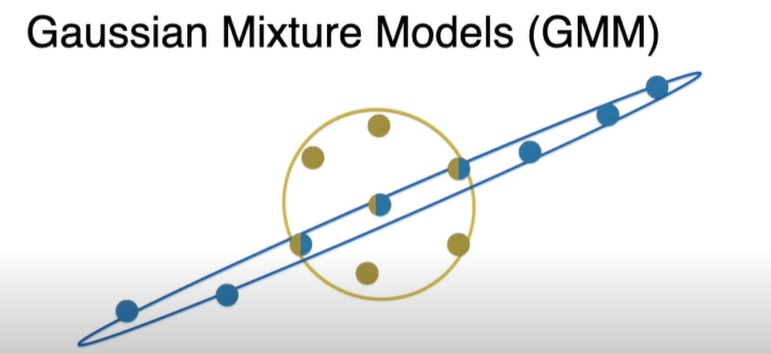

gaussian Mixtures is useful like this situation.

---
---
---


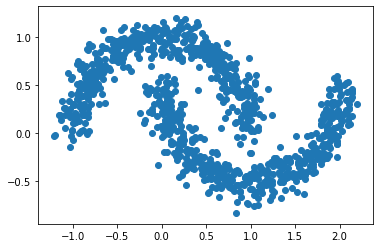

In [112]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=1000, noise=0.1)
from matplotlib import pyplot as plt
plt.scatter(X[:,0],X[:,1])

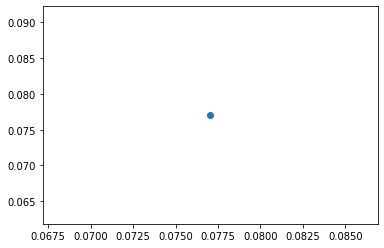

In [164]:
plt.scatter(X[0][0],X[0][0])

In [118]:
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components=2, n_init=2)
gm.fit(X)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=2, n_init=2, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [132]:
gm.predict([[0,1]])

array([0], dtype=int64)

In [119]:
gm.weights_

array([0.49472212, 0.50527788])

In [120]:
gm.means_

array([[-0.1469103 ,  0.63603257],
       [ 1.13792905, -0.13863308]])

In [121]:
#How changing each cluster 
gm.covariances_

array([[[0.34236049, 0.04865803],
        [0.04865803, 0.0990212 ]],

       [[0.36350179, 0.05173442],
        [0.05173442, 0.11038185]]])

Covariance:

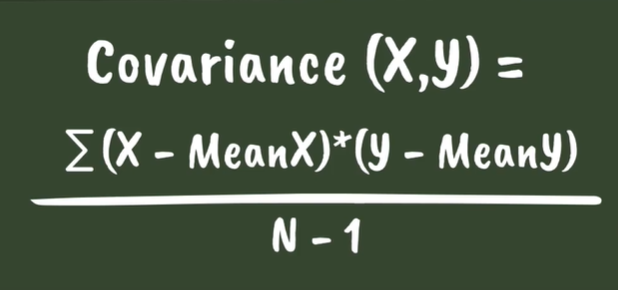

---------------**WARNING**----------------

    Unfortunately, just like K-Means, EM can end up converging to poor solutions, so it needs to be run several times, keeping only the best solution. This is why we set n_init to 10. Be careful: by default n_init is set to 1.

You can check whether or not the algorithm converged and how many iterations it took:

In [123]:
gm.converged_

True

In [122]:
gm.n_iter_

5

In [126]:
X_new, y_new = gm.sample(6)
X_new

array([[-0.05651798,  0.49298035],
       [ 1.91033165, -0.5483734 ],
       [ 0.13758747, -0.14731983],
       [ 1.20751658, -0.69455301],
       [-0.66505049,  0.17625692],
       [-0.26044491,  0.06668317]])

In [176]:
#for each instance it is given, this method estimates the log of the probability density function (PDF) at that location.
gm.score_samples(X)[:20]

array([-2.09335421, -2.83008215, -2.34193583, -1.48634753, -1.11043938,
       -1.46266513, -1.16650343, -2.09853075, -2.46157453, -1.2361491 ,
       -1.59796144, -1.41702482, -1.54723937, -3.18132618, -1.63443549,
       -2.28994932, -2.06503757, -2.20427408, -0.99727287, -1.3524497 ])

In [181]:
gm.score_samples([[-0.15,0.86]])

array([-1.08652467])

In [182]:
gm.score_samples([[10,10]])

array([-490.905288])

---
---
---
---

###  An extra example:

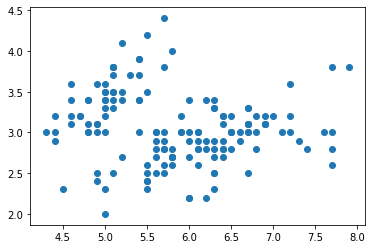

In [322]:
from pandas import DataFrame
from sklearn import datasets
import pandas as pd
iris = datasets.load_iris()
X = iris.data[:, :2] # take 2 column
d = pd.DataFrame(X)
plt.scatter(d[0], d[1])

In [328]:
#Fitting data with 3 gaussians: 
gmm=GaussianMixture(n_components=3,n_init=10)
gmm.fit(d)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=3, n_init=10,
                precisions_init=None, random_state=None, reg_covar=1e-06,
                tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
                weights_init=None)

In [329]:
labels=gmm.predict(d)
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2,
       2, 0, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 0, 2, 2, 2,
       0, 0, 0, 2, 2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int64)

In [330]:
d['labels']=labels

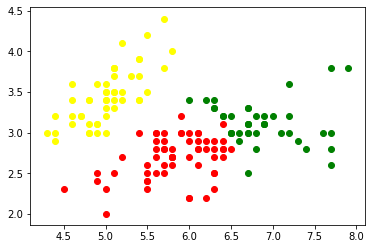

In [331]:
d0=d[d['labels']==0]
d1=d[d['labels']==1]
d2=d[d['labels']==2]
#d3=d[d['labels']==3]

# plot three clusters in same plot
plt.scatter(d0[0], d0[1], c ='r')
plt.scatter(d1[0], d1[1], c ='yellow')
plt.scatter(d2[0], d2[1], c ='g')
#plt.scatter(d3[0], d3[1], c ='b')

Print the converged log-likelihood value and no. of iterations needed for the model to converge

In [333]:
# print the converged log-likelihood value
print(gmm.lower_bound_)
  
# print the number of iterations needed
# for the log-likelihood value to converge
print(gmm.n_iter_)

4.372457879667469
2


Hence, it needed 7 iterations for the log-likelihood to converge. If more iterations are performed, no appreciable change in the log-likelihood value, can be observed.

---
---
---
---

So, ve gave correct number of customers in our examples. But in real life, datas is could be hight dimensional or not be gaussian. Where there is may cluster or hight dimensional, our EM algorithm is struggle for EM(Expectation-Maximization algorithm. Sometimes, we have to reduce dimension OOORR;  Another way to do this is to limit the range of shapes and orientations that the clusters can have. This can be achieved by imposing constraints on the covariance matrices. To do this, set the covariance_type hyperparameter to one of the following values:

"spherical"
All clusters must be spherical, but they can have different diameters (i.e., different variances).

"diag"
Clusters can take on any ellipsoidal shape of any size, but the ellipsoid’s axes must be parallel to the coordinate axes (i.e., the covariance matrices must be diagonal).

"tied"
All clusters must have the same ellipsoidal shape, size, and orientation (i.e., all clusters share the same covariance matrix).

By default, covariance_type is equal to "full", which means that each cluster can take on any shape, size, and orientation (it has its own unconstrained covariance matrix). Figure 9-18 plots the solutions found by the EM algorithm when covariance_type is set to "tied" or "spherical.”

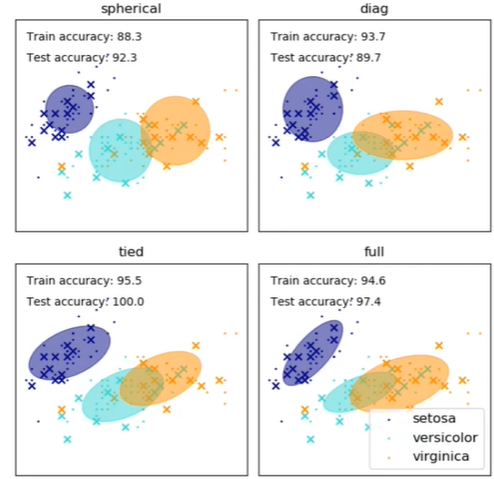

## Anomaly Detection Using Gaussian Mixtures

Lets say your company said: "our defective product is 4 percent." So you can set threashold that give us to you 4% instances located in areas below that threshold density.

If you notice that you get too many false positives (i.e., perfectly good products that are flagged as defective), you can lower the threshold. Conversely, if you have too many false negatives (i.e., defective products that the system does not flag as defective), you can increase the threshold. This is the usual precision/recall trade-off (see Chapter 3). 

In [19]:
import numpy as np
densities = gm.score_samples(X)
density_threshold = np.percentile(densities, 4)
anomalies = X[densities < density_threshold]

NameError: name 'gm' is not defined

In [337]:
anomalies

array([[5.8, 4. ],
       [5.7, 4.4],
       [5.5, 4.2],
       [7.2, 3.6],
       [7.7, 3.8],
       [7.9, 3.8]])

### Selecting the Number of Clusters

İnertia or the silhouette score is not possible to use these parameter because they are not reliable when the clusters are not spherical or have different sizes.

Instead, you can try to find the model that minimizes a theoretical information criterion, such as the Bayesian information **criterion (BIC)** or the **Akaike information criterion (AIC)**, defined in Equation 9-1.

 They often end up selecting the same model. When they differ, the model selected by the BIC tends to be simpler (fewer parameters) than the one selected by the AIC, but tends to not fit the data quite as well (this is especially true for larger datasets).

To compute the **BIC** and **AIC**, call the **bic(**) and **aic()** methods:

In [17]:
from pandas import DataFrame
from sklearn import datasets
import pandas as pdÜ
iris = datasets.load_iris()
X = iris.data[:, :2] # take 2 column
d = pd.DataFrame(X)
plt.scatter(d[0], d[1])

C:\Users\bedir\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


NameError: name 'pd' is not defined

In [358]:
gm.bic(d)

19031.759786374627

In [359]:
gm.aic(d)

18998.64279813957

In [386]:
n_component=np.arange(1,8)
n_component

array([1, 2, 3, 4, 5, 6, 7])

In [387]:
models=[GaussianMixture(n_components= n).fit(d) for n in n_component]

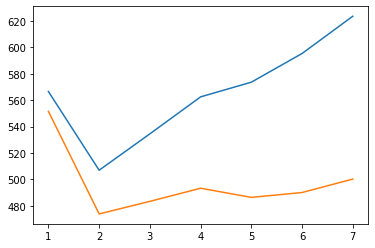

In [388]:
plt.plot(n_component, [m.bic(d) for m in models])
plt.plot(n_component, [m.aic(d) for m in models])

In [382]:
# as you can see, a value between 2 is optimum n_components/cluster values 

### Bayesian Gaussian Mixture Models

I thing you never use it. But maybe use :d Check out the book.

---
### Other Algorithms for Anomaly and Novelty Detection

PCA (and other dimensionality reduction techniques with an inverse_transform() method)

Isolation Forest
This is an efficient algorithm for outlier detection, especially in high-dimensional datasets

One-class SVM
This algorithm is better suited for novelty detection. Recall that a kernelized SVM classifier separates two classes by first (implicitly) mapping all the instances to a high-dimensional space, then separating the two classes using a linear SVM classifier within this high-dimensional space (see Chapter 5). Since we just have one class of instances, the one-class SVM algorithm instead tries to separate the instances in high-dimensional space from the origin. In the original space, this will correspond to finding a small region that encompasses all the instances. If a new instance does not fall within this region, it is an anomaly. There are a few hyperparameters to tweak: the usual ones for a kernelized SVM, plus a margin hyperparameter that corresponds to the probability of a new instance being mistakenly considered as novel when it is in fact normal. It works great, especially with high-dimensional datasets, but like all SVMs it does not scale to large datasets. (look at this again, with looking svm)

---
---
---
---

# Exercises

How would you define clustering? Can you name a few clustering algorithms?

    Clustering is a unsupervised method. When you have unlabeled data, you can cluster each similar instances. 
    
    A fex clustered algorithms is; kmeans, DBSCAN, meanshif, affinity, spectral.. etc...

What are some of the main applications of clustering algorithms?
    
    Anomaly Detection, Novelty Detection, Semi-Supervised tasks, image searces, image segmentation... etc..


Describe two techniques to select the right number of clusters when using K-Means.

    we can use silhouette_score. Or ebow of inerita hand .)


What is label propagation? Why would you implement it, and how?

    When we clustered an unlabeled dataset, we can spread our a small number of labelded data to own cluster.
    

Can you name two clustering algorithms that can scale to large datasets? And two that look for regions of high density?

    K-Means and BIRCH scale well to large datasets. DBSCAN and Mean-Shift look for regions of high density.

Can you think of a use case where active learning would be useful? How would you implement it?
    
     In this case (which is very common), rather than randomly selecting instances to label, it is often preferable to perform active learning, where human experts interact with the learning algorithm, providing labels for specific instances when the algorithm requests them.

What is the difference between anomaly detection and novelty detection?

    Many people use the terms anomaly detection and novelty detection interchangeably, but they are not exactly the same. In anomaly detection, the algorithm is trained on a dataset that may contain outliers, and the goal is typically to identify these outliers (within the training set), as well as outliers among new instances. In novelty detection, the algorithm is trained on a dataset that is presumed to be “clean,” and the objective is to detect novelties strictly among new instances. Some algorithms work best for anomaly detection (e.g., Isolation Forest), while others are better suited for novelty detection (e.g., one-class SVM).

What is a Gaussian mixture? What tasks can you use it for?

    A Gaussian mixture model (GMM) is a probabilistic model that assumes that the instances were generated from a mixture of several Gaussian distributions whose parameters are unknown. 
    

Can you name two techniques to find the right number of clusters when using a Gaussian mixture model?

    Bayesian information criterion (BIC) or the Akaike information criterion (AIC)

---
The classic Olivetti faces dataset contains 400 grayscale 64 × 64–pixel images of faces. Each image is flattened to a 1D vector of size 4,096. 40 different people were photographed (10 times each), and the usual task is to train a model that can predict which person is represented in each picture. Load the dataset using the sklearn.datasets.fetch_olivetti_faces() function, then split it into a training set, a validation set, and a test set (note that the dataset is already scaled between 0 and 1). Since the dataset is quite small, you probably want to use stratified sampling to ensure that there are the same number of images per person in each set. Next, cluster the images using K-Means, and ensure that you have a good number of clusters (using one of the techniques discussed in this chapter). Visualize the clusters: do you see similar faces in each cluster?

**Elimizde her biri 10 kez fotoğraflanmış 10 farklı kişi var. Bu 10 farklı kişinin her birini birbirinden ayırabileceğimiz bir model geliştirmek istiyoruz.**


In [35]:
#Veri setinin import edelim
from sklearn.datasets import fetch_olivetti_faces
olivetti = fetch_olivetti_faces()

In [23]:
olivetti.keys()

dict_keys(['data', 'images', 'target', 'DESCR'])

In [49]:
# data, her fotoğraftaki 64*64= 4096 piksel olan görsellerin her pikselinin degerini tek boyutlu bir vektor olarak icerir
# target, kişilerin doğru sınıflandırılmış degerlerini içerir:
olivetti.target

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22,
       22, 22, 22, 22, 22

In [24]:
#Bagımlı degiskenleri y'ye bagımsız degiskenleri X'e atayalım.
X, y = olivetti["data"], olivetti["target"]
X.shape

(400, 4096)

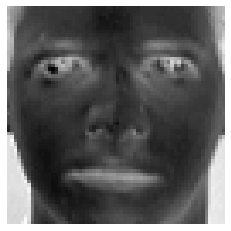

In [36]:
#1. görsel, görüntüleyelim
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X[0]
some_digit_image = some_digit.reshape(64, 64)
plt.imshow(some_digit_image, cmap=mpl.cm.binary)
plt.axis("off")
plt.show()

### Look at images:

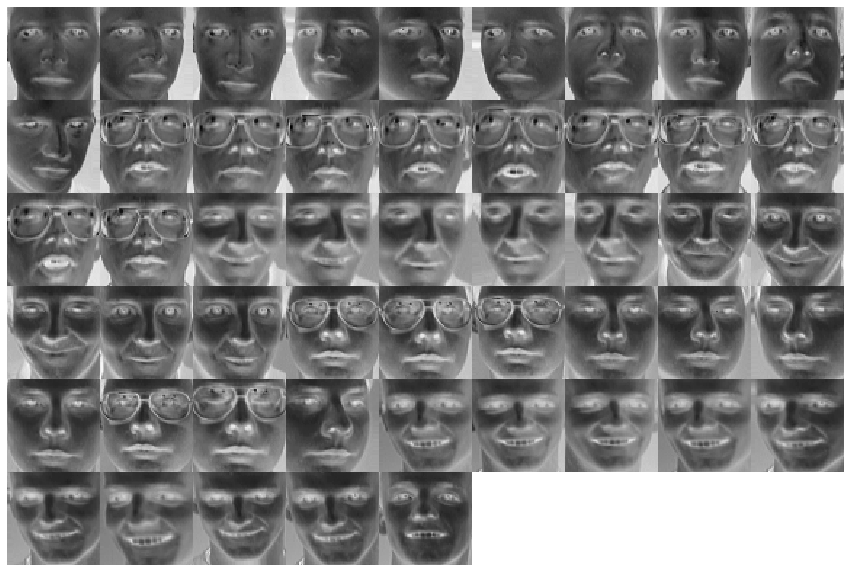

In [231]:
#ilk elli göseli görüntüleyelim. 
def plot_faces(instances, images_per_row=10, **options):
    size = 64
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")
plt.figure(figsize=(15,15))
example_images = X[:50]
plot_faces(example_images, images_per_row=9)
plt.show()

**->** Resimleri incelerseniz, bazı görsellerde, aynı kisilerin olduğunu fark edebilirsiniz.

Şimdi hedefimiz, verisetindeki bu görselleri(kişileri) dogru sayıda kümeye ayırmak (doğru sayı 10 olacaktır çünkü 10 farklı insan var :d ama gerçek hayatta büyük ihtimalle böyle bir bilgiye sahip olmayacağız. Bu bilgiye sahip değiliz gibi devam edelim.)

Train ve test seti olarak bölelim. Zaten kücük bir veriseti olduğundan (400 örnek), train ve testte her sınıftan eşit oranda bulunması için **StratifiedShuffleSplit** i kullanacağız.

In [93]:
from warnings import filterwarnings
filterwarnings('ignore') #uyari almamak icin.
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=1, test_size=40, random_state=0)
train_valid_idx, test_idx = next(sss.split(X,y))
X_train_valid = olivetti.data[train_valid_idx]
y_train_valid = olivetti.target[train_valid_idx]
X_test = olivetti.data[test_idx]
y_test = olivetti.target[test_idx]

strat_split = StratifiedShuffleSplit(n_splits=1, test_size=80, random_state=43)
train_idx, valid_idx = next(strat_split.split(X_train_valid, y_train_valid))
X_train = X_train_valid[train_idx]
y_train = y_train_valid[train_idx]
X_valid = X_train_valid[valid_idx]
y_valid = y_train_valid[valid_idx]

In [94]:
print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)
print(X_test.shape, y_test.shape)

(280, 4096) (280,)
(80, 4096) (80,)
(40, 4096) (40,)


Simdi, görüntü kümeleme işlemlerinde, görüntülerin belirli kısımlarının her görüntüde aynı olması sebebiyle 
verinin boyutunu azaltmak eğitimi hızlandımrak için önemlidir ve genelde pek bir bilgi kaybı olmadan halledilir

PCA kullanarak bunu yapalım:

In [181]:
from sklearn.decomposition import PCA
pca=PCA(0.99) # 0.99= varyansın %99 unu açıklayacak kadar özelliği al demek. 
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_valid_pca = pca.transform(X_valid)
X_test_pca = pca.transform(X_test)

Şimdi K-Means algoritması kullanarak verimizi kümelere ayıracağız. Ama öncesinde optimum k degerini bulmalıyız:

In [213]:
from sklearn.cluster import KMeans
k_range=range(2, 150, 5)
kmeans_per_k = []
for k in k_range:
    print("k={}".format(k))
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X_train_pca)
    kmeans_per_k.append(kmeans)

k=2
k=7
k=12
k=17
k=22
k=27
k=32
k=37
k=42
k=47
k=52
k=57
k=62
k=67
k=72
k=77
k=82
k=87
k=92
k=97
k=102
k=107
k=112
k=117
k=122
k=127
k=132
k=137
k=142
k=147


Optimum k değerini bulmak için **silhouette_score**'u' kullanalım:

In [214]:
from sklearn.metrics import silhouette_score

silhouette_scores = [silhouette_score(X_train_pca, model.labels_)
                     for model in kmeans_per_k]
best_index = np.argmax(silhouette_scores)
best_k = k_range[best_index]
best_score = silhouette_scores[best_index]

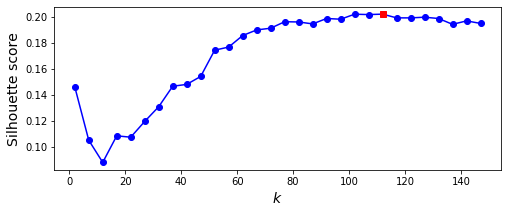

In [226]:
plt.figure(figsize=(8, 3))
plt.plot(k_range, silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.plot(best_k, best_score, "rs")
plt.show()

In [227]:
best_k

112

112 nin optimum kume sayısı olduğunu bulduk. bu durumda 107-117 arasındaki degerleri bir daha tarayabiliriz. Çünkü o degerlere bakmadık. Şu an bunu yapmayacağız.Açıkçası ben, ideal küme sayısının 40 olacağını düşünmüştüm, ama anı insanlarn farklı görselleri olabilir.

In [228]:
best_model = kmeans_per_k[best_index]

In [232]:
best_model.labels_

array([1, 2, 3, 4])

Cluster 0


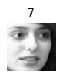

Cluster 1


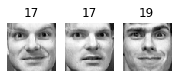

Cluster 2


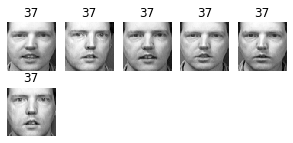

Cluster 3


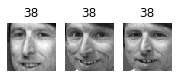

Cluster 4


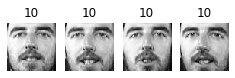

Cluster 5


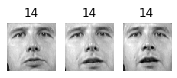

Cluster 6


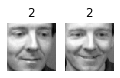

Cluster 7


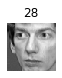

Cluster 8


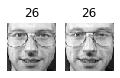

Cluster 9


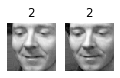

Cluster 10


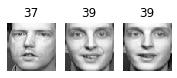

Cluster 11


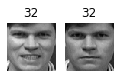

Cluster 12


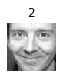

Cluster 13


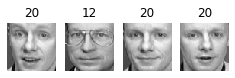

Cluster 14


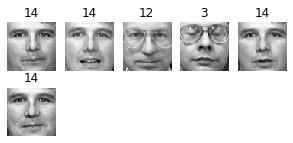

Cluster 15


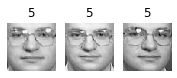

Cluster 16


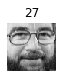

Cluster 17


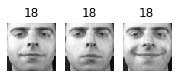

Cluster 18


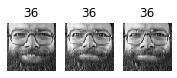

Cluster 19


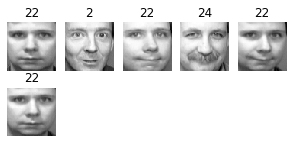

Cluster 20


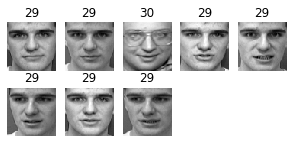

Cluster 21


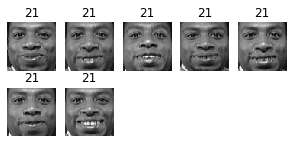

Cluster 22


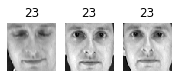

Cluster 23


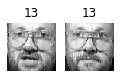

Cluster 24


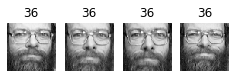

Cluster 25


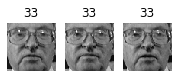

Cluster 26


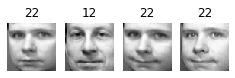

Cluster 27


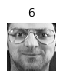

Cluster 28


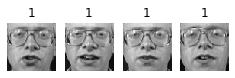

Cluster 29


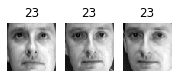

Cluster 30


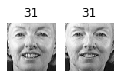

Cluster 31


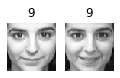

Cluster 32


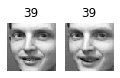

Cluster 33


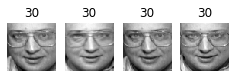

Cluster 34


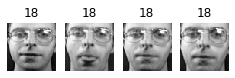

Cluster 35


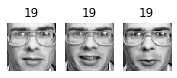

Cluster 36


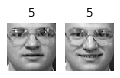

Cluster 37


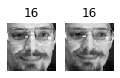

Cluster 38


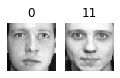

Cluster 39


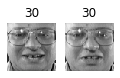

Cluster 40


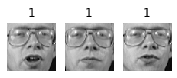

Cluster 41


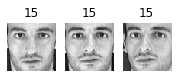

Cluster 42


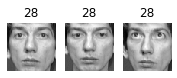

Cluster 43


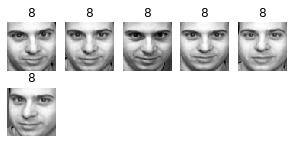

Cluster 44


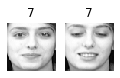

Cluster 45


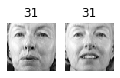

Cluster 46


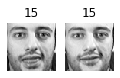

Cluster 47


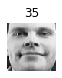

Cluster 48


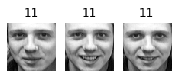

Cluster 49


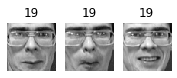

Cluster 50


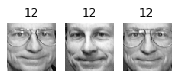

Cluster 51


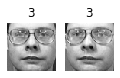

Cluster 52


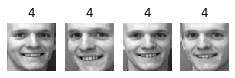

Cluster 53


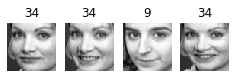

Cluster 54


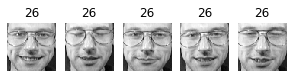

Cluster 55


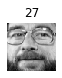

Cluster 56


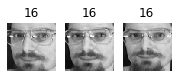

Cluster 57


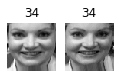

Cluster 58


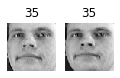

Cluster 59


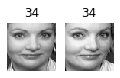

Cluster 60


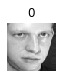

Cluster 61


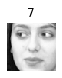

Cluster 62


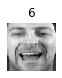

Cluster 63


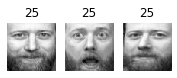

Cluster 64


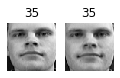

Cluster 65


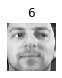

Cluster 66


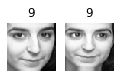

Cluster 67


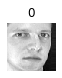

Cluster 68


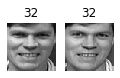

Cluster 69


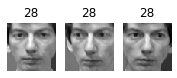

Cluster 70


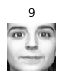

Cluster 71


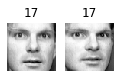

Cluster 72


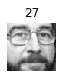

Cluster 73


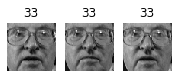

Cluster 74


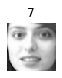

Cluster 75


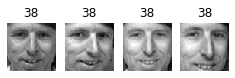

Cluster 76


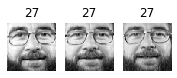

Cluster 77


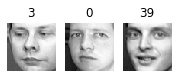

Cluster 78


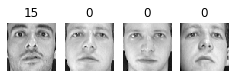

Cluster 79


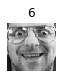

Cluster 80


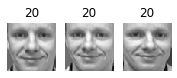

Cluster 81


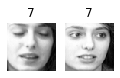

Cluster 82


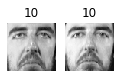

Cluster 83


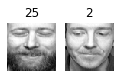

Cluster 84


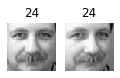

Cluster 85


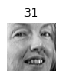

Cluster 86


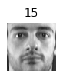

Cluster 87


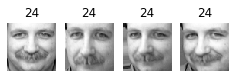

Cluster 88


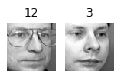

Cluster 89


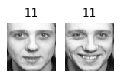

Cluster 90


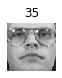

Cluster 91


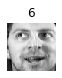

Cluster 92


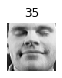

Cluster 93


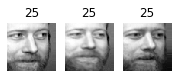

Cluster 94


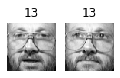

Cluster 95


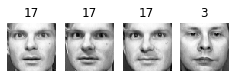

Cluster 96


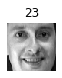

Cluster 97


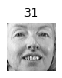

Cluster 98


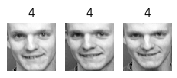

Cluster 99


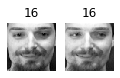

Cluster 100


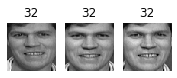

Cluster 101


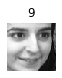

Cluster 102


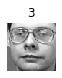

Cluster 103


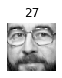

Cluster 104


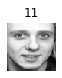

Cluster 105


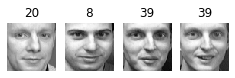

Cluster 106


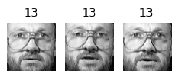

Cluster 107


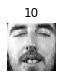

Cluster 108


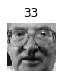

Cluster 109


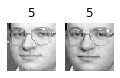

Cluster 110


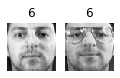

Cluster 111


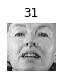

In [229]:
def plot_faces(faces, labels, n_cols=5):
    faces = faces.reshape(-1, 64, 64)
    n_rows = (len(faces) - 1) // n_cols + 1
    plt.figure(figsize=(n_cols, n_rows * 1.1))
    for index, (face, label) in enumerate(zip(faces, labels)):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(face, cmap="gray")
        plt.axis("off")
        plt.title(label)
    plt.show()

for cluster_id in np.unique(best_model.labels_):
    print("Cluster", cluster_id)
    in_cluster = best_model.labels_==cluster_id
    faces = X_train[in_cluster]
    labels = y_train[in_cluster]
    plot_faces(faces, labels)

Continuing with the Olivetti faces dataset, train a classifier to predict which person is represented in each picture, and evaluate it on the validation set. Next, use K-Means as a dimensionality reduction tool, and train a classifier on the reduced set. Search for the number of clusters that allows the classifier to get the best performance: what performance can you reach? What if you append the features from the reduced set to the original features (again, searching for the best number of clusters)?



Train a Gaussian mixture model on the Olivetti faces dataset. To speed up the algorithm, you should probably reduce the dataset’s dimensionality (e.g., use PCA, preserving 99% of the variance). Use the model to generate some new faces (using the sample() method), and visualize them (if you used PCA, you will need to use its inverse_transform() method). Try to modify some images (e.g., rotate, flip, darken) and see if the model can detect the anomalies (i.e., compare the output of the score_samples() method for normal images and for anomalies).



Some dimensionality reduction techniques can also be used for anomaly detection. For example, take the Olivetti faces dataset and reduce it with PCA, preserving 99% of the variance. Then compute the reconstruction error for each image. Next, take some of the modified images you built in the previous exercise, and look at their reconstruction error: notice how much larger the reconstruction error is. If you plot a reconstructed image, you will see why: it tries to reconstruct a normal face.